# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Fitri Hartanti
- **Email:** fitrihartanti@mail.ugm.ac.id
- **ID Dicoding:** MC008D5X2339

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda berdasarkan musim dan kondisi cuaca?
- Apakah ada perbedaan pola penggunaan sepeda antara pengguna kasual dan pengguna terdaftar?
- Faktor lingkungan apa yang paling memengaruhi jumlah penyewaan sepeda?
- Bagaimana dampak hari libur terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("hour.csv") 
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Granularitas Data → hour.csv mencatat data per jam, cocok untuk analisis pola harian; day.csv mencatat data per hari, cocok untuk tren jangka panjang.
- Detail Waktu → hour.csv memiliki kolom jam (hr), memungkinkan analisis jam sibuk; day.csv tidak memiliki kolom ini, hanya menunjukkan total harian.

### Assessing Data

#### Menilai tabel `day_df`

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Terdapat tiga tipe data pada `day_df` yaitu object, float, dan integer.
- Tidak terdapat nilai Null dan NaN pada `day_df`
- Tidak terdapat duplikasi pada `day_df`

#### Menilai tabel `hour_df`

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Terdapat tiga tipe data pada `hour_df` yaitu object, float, dan integer.
- Tidak terdapat nilai Null dan NaN pada `hour_df`
- Tidak terdapat duplikasi pada `hour_df`

### Cleaning Data

#### Membersihkan tabel `day_df`

In [33]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

##### Memperbaiki tipe data

In [13]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [14]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [15]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Membersihkan tabel `hour_df`

In [16]:
hour_df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


##### Memperbaiki tipe data

In [17]:
datetime_columns = ["dteday"]

for column in datetime_columns:
    hour_df[column] = pd.to_datetime(hour_df[column])

In [18]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [19]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
Dilakukan pembersihan data pada kedua dataset yaitu mengubah tipe data pada fitur `dteday` pada kedua dataset.

## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [20]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
294,295,2011-10-22,4,0,10,0,6,0,1,0.422500,0.425492,0.629167,0.092667,1499,2809,4308
476,477,2012-04-21,2,1,4,0,6,0,1,0.570000,0.542921,0.682917,0.283587,2541,4083,6624
455,456,2012-03-31,2,1,3,0,6,0,2,0.424167,0.421708,0.738333,0.250617,2301,3934,6235
695,696,2012-11-26,4,1,11,0,1,1,1,0.313333,0.339004,0.535417,0.046650,337,4750,5087
45,46,2011-02-15,1,0,2,0,2,1,1,0.266087,0.254274,0.314348,0.291374,140,1675,1815


In [21]:
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


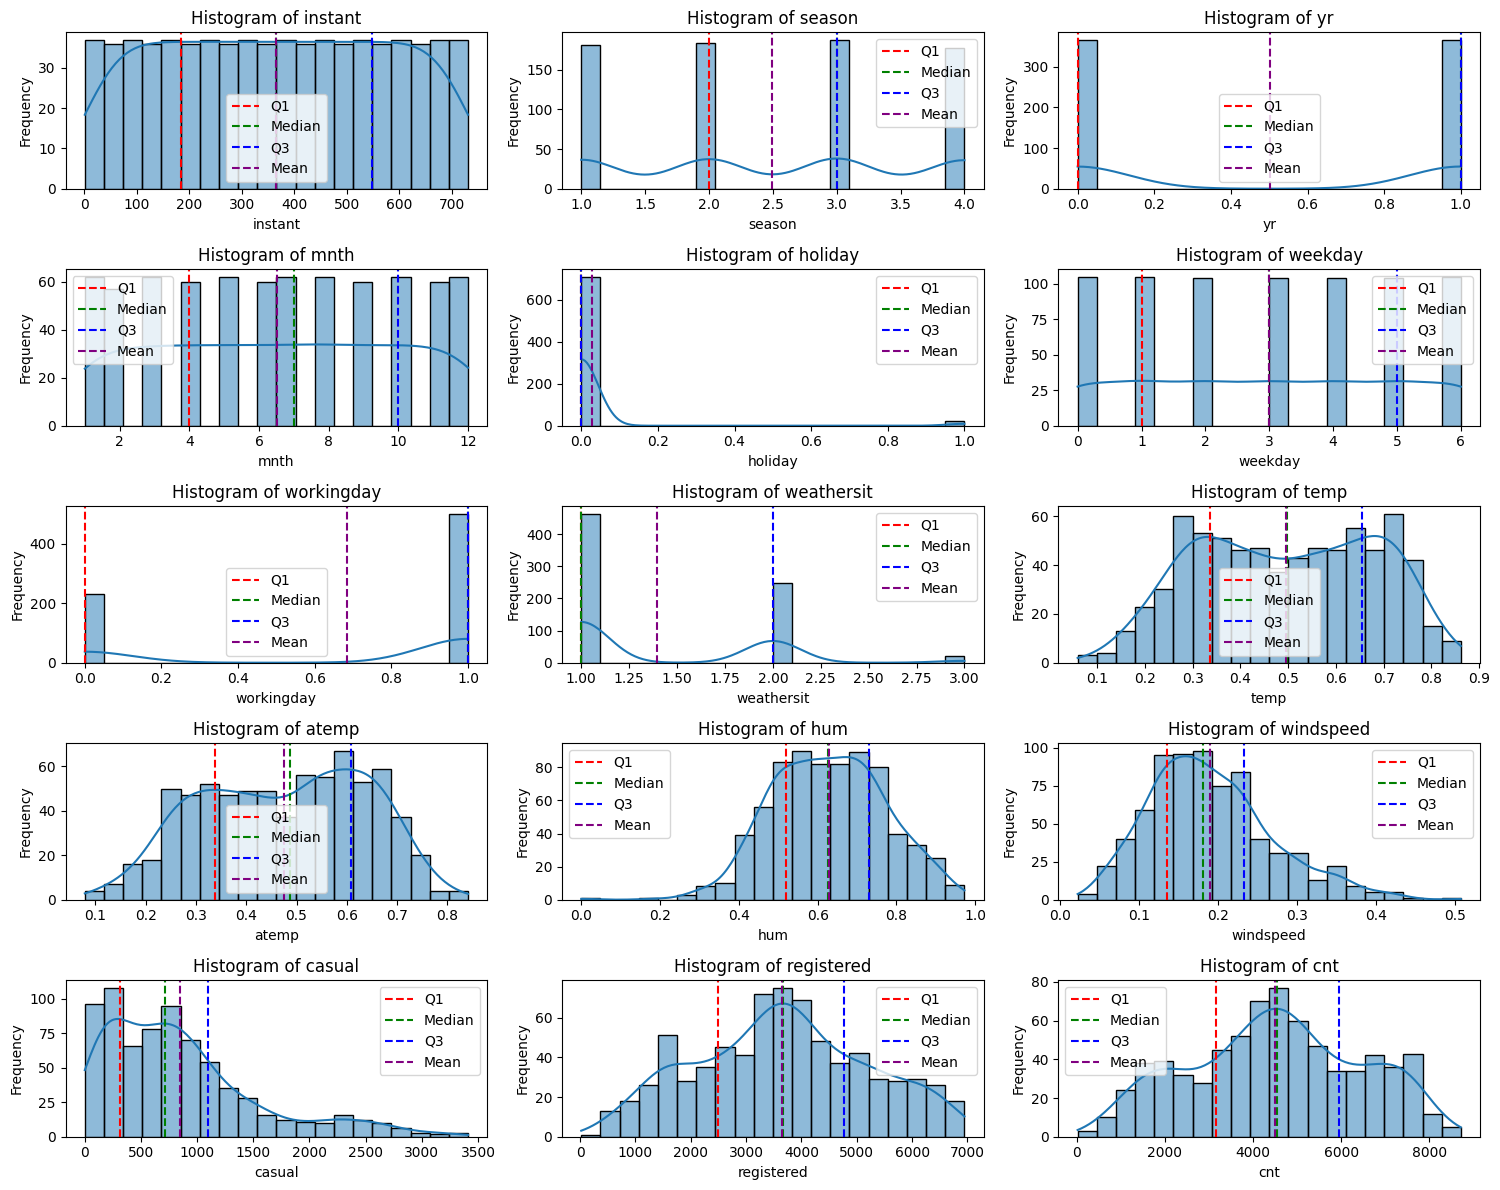

In [24]:
# Mendefinisikan fitur numerik kecuali 'dteday'
num_features = day_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

fig, axes = plt.subplots(5, 3, figsize=(15, 12))
axes = axes.flatten()

# Loop melalui fitur numerik dan plot di masing-masing subplot
for i, var in enumerate(num_features):
    q1 = day_df[var].quantile(0.25)
    median = day_df[var].median()
    q3 = day_df[var].quantile(0.75)
    mean = day_df[var].mean()

    sn.histplot(data=day_df, x=var, bins=20, kde=True, ax=axes[i])

    # Tambahkan garis vertikal untuk Q1, Median, Q3, dan Mean
    axes[i].axvline(q1, color='red', linestyle='--', label='Q1')
    axes[i].axvline(median, color='green', linestyle='--', label='Median')
    axes[i].axvline(q3, color='blue', linestyle='--', label='Q3')
    axes[i].axvline(mean, color='purple', linestyle='--', label='Mean')

    axes[i].set_title(f'Histogram of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

for j in range(len(num_features), len(axes)):  
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Explore `hour_df`

In [25]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
6543,6544,2011-10-05,4,0,10,5,0,3,1,1,0.44,0.4394,0.82,0.1343,3,29,32
16905,16906,2012-12-12,4,1,12,4,0,3,1,1,0.26,0.3030,0.60,0.0000,0,4,4
13929,13930,2012-08-08,3,1,8,14,0,3,1,2,0.80,0.7424,0.52,0.2537,63,173,236
4736,4737,2011-07-21,3,0,7,6,0,4,1,2,0.72,0.7121,0.84,0.1045,6,111,117
7419,7420,2011-11-10,4,0,11,18,0,4,1,2,0.36,0.3485,0.81,0.1642,10,263,273


In [26]:
hour_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


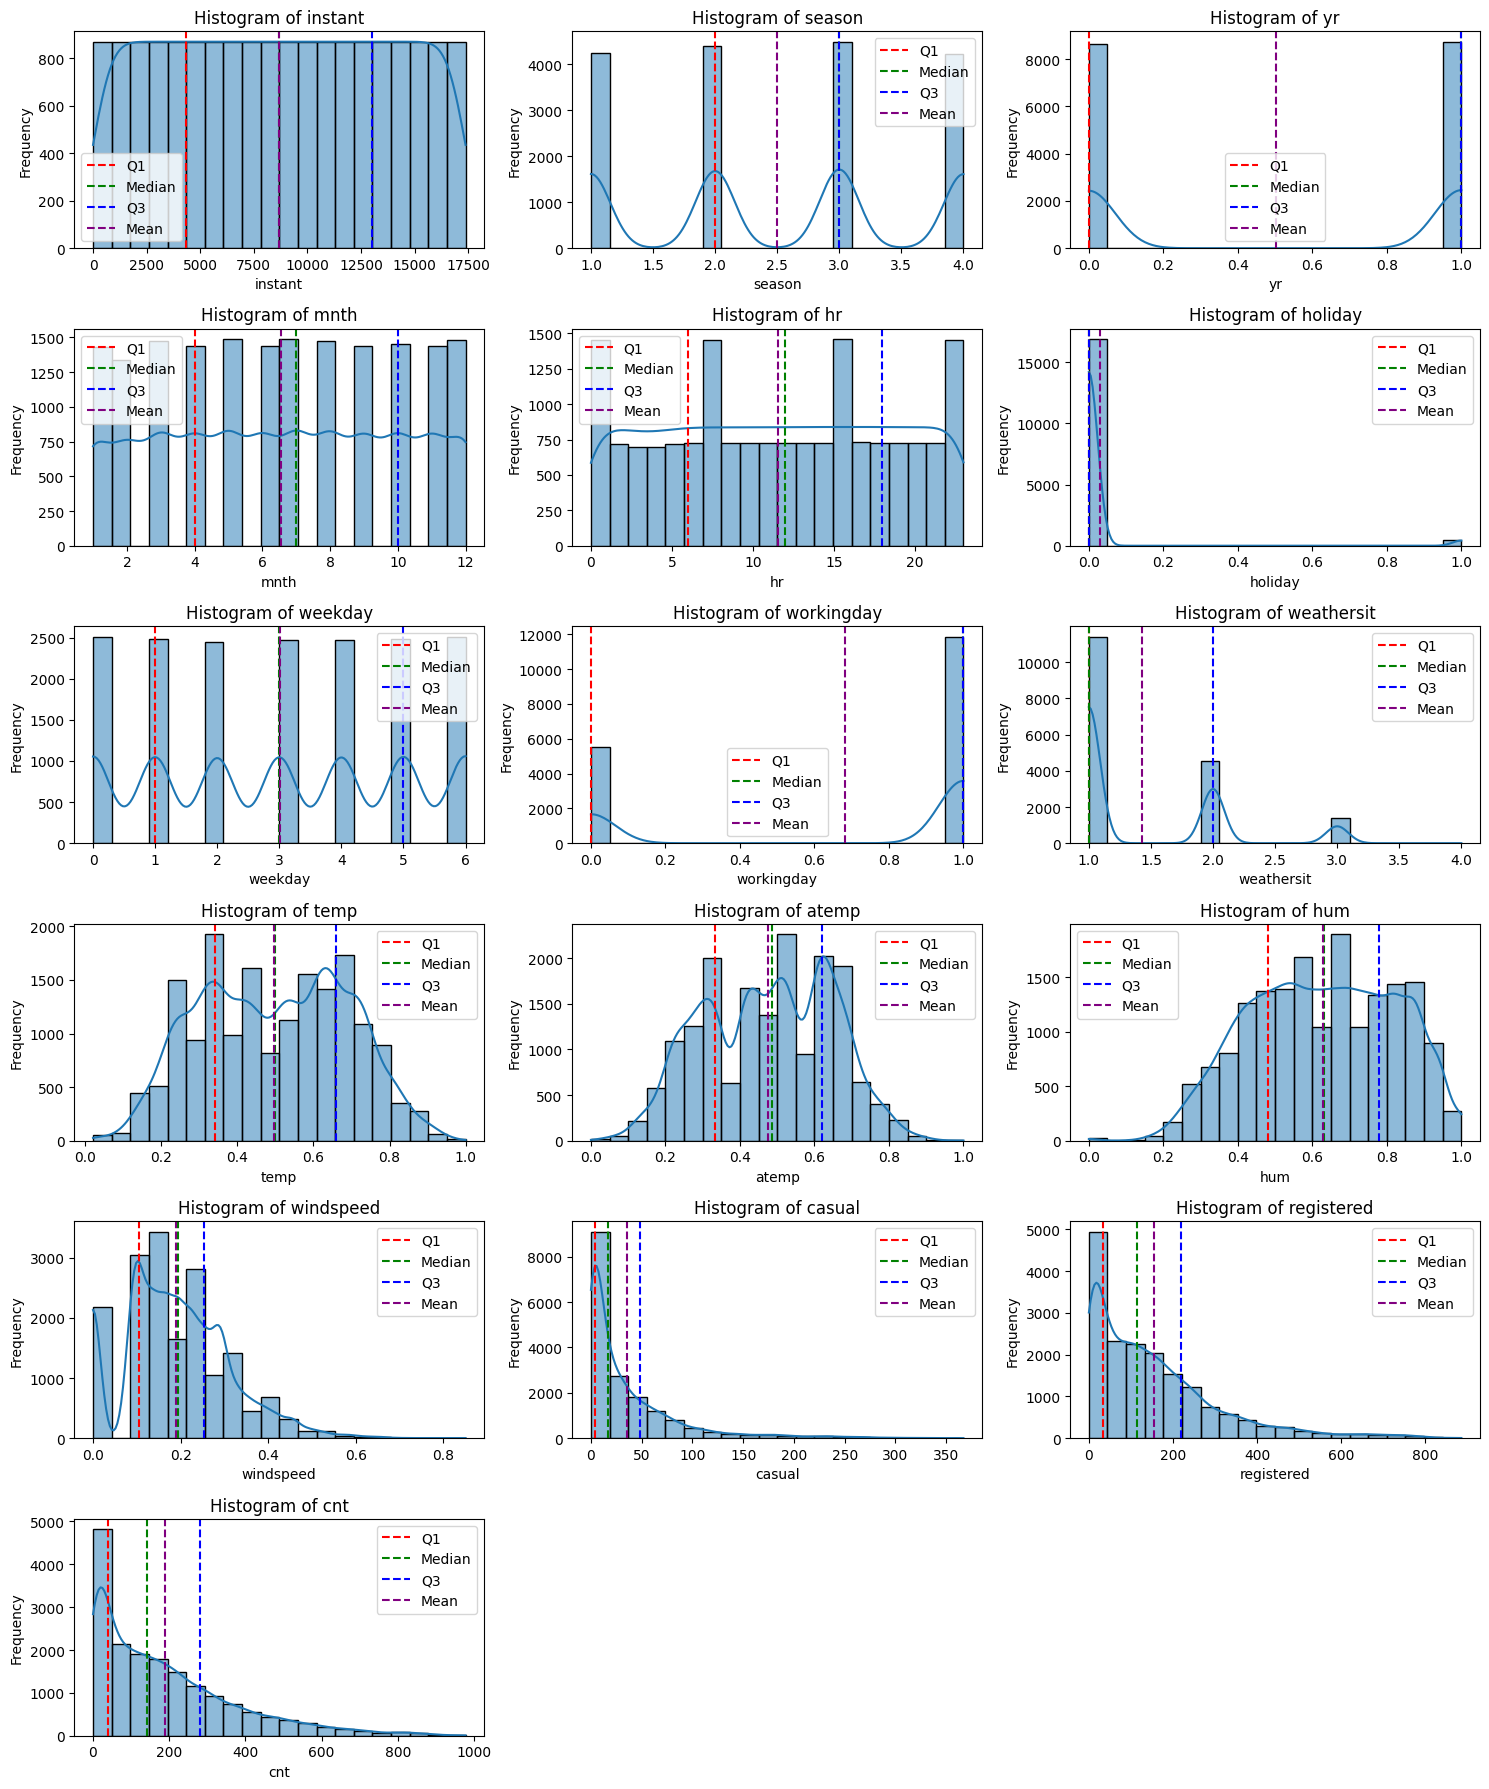

In [28]:
# Mendefinisikan fitur numerik kecuali 'dteday'
num_features = hour_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

fig, axes = plt.subplots(6, 3, figsize=(15, 18))  # Adjusted to 6 rows and 3 columns to fit all features
axes = axes.flatten()

# Loop melalui fitur numerik dan plot di masing-masing subplot
for i, var in enumerate(num_features):
    q1 = hour_df[var].quantile(0.25)
    median = hour_df[var].median()
    q3 = hour_df[var].quantile(0.75)
    mean = hour_df[var].mean()

    sn.histplot(data=hour_df, x=var, bins=20, kde=True, ax=axes[i])

    # Tambahkan garis vertikal untuk Q1, Median, Q3, dan Mean
    axes[i].axvline(q1, color='red', linestyle='--', label='Q1')
    axes[i].axvline(median, color='green', linestyle='--', label='Median')
    axes[i].axvline(q3, color='blue', linestyle='--', label='Q3')
    axes[i].axvline(mean, color='purple', linestyle='--', label='Mean')

    axes[i].set_title(f'Histogram of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

for j in range(len(num_features), len(axes)):  
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Insight:**

Secara keseluruhan, distribusi variabel pada kedua dataset cukup serupa, tetapi terdapat perbedaan yang ada dalam distribusi kedua dataset tersebut, yaitu:
- Pola Peminjaman Berbeda → Dataset hour.csv menunjukkan pola peminjaman berfluktuasi dalam sehari dengan puncak di pagi dan sore hari, sedangkan day.csv hanya menampilkan tren harian tanpa variasi jam.

- Distribusi Jumlah Peminjaman → hour.csv memiliki distribusi cnt yang right-skewed (banyak jam dengan peminjaman rendah, beberapa sangat tinggi), sedangkan day.csv lebih simetris karena data sudah teragregasi harian.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana pola penggunaan sepeda berdasarkan musim dan kondisi cuaca?

C:\Users\acer\AppData\Local\Temp\ipykernel_15132\3251981334.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x='season', y='cnt', data=seasonal_data, palette='viridis')


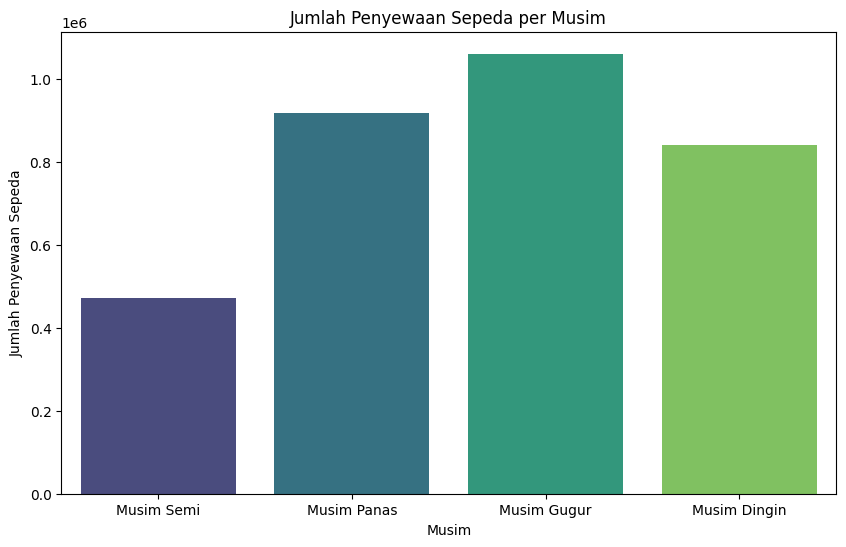

In [30]:
# Mengelompokkan data berdasarkan musim dan menghitung jumlah penyewaan sepeda
seasonal_data = day_df.groupby('season')['cnt'].sum().reset_index()

# Membuat diagram batang
plt.figure(figsize=(10, 6))
sn.barplot(x='season', y='cnt', data=seasonal_data, palette='viridis')

# Menambahkan judul dan label sumbu
plt.title('Jumlah Penyewaan Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'])

# Menampilkan plot
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_15132\3741950468.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.boxplot(x='weathersit', y='cnt', data=day_df, palette='viridis')


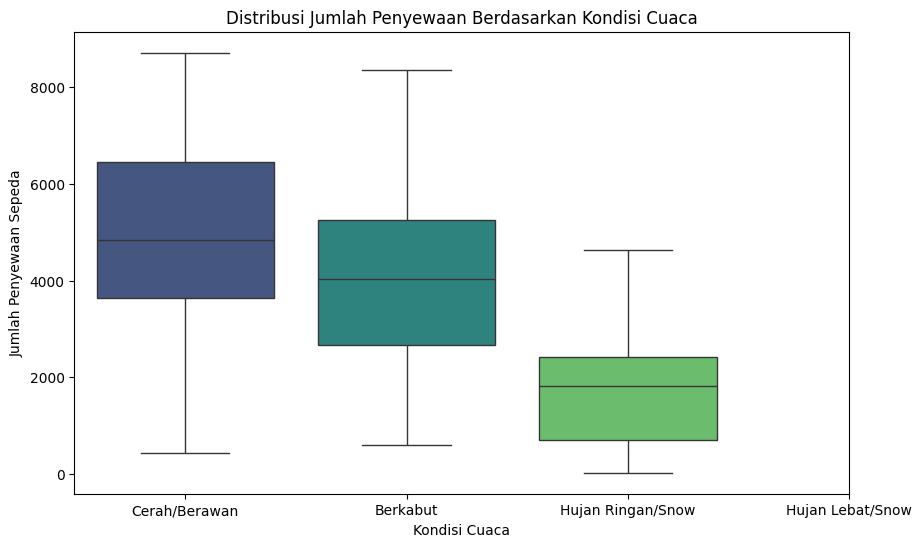

In [31]:
plt.figure(figsize=(10, 6))
sn.boxplot(x='weathersit', y='cnt', data=day_df, palette='viridis')

# Menambahkan judul dan label sumbu
plt.title('Distribusi Jumlah Penyewaan Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Cerah/Berawan', 'Berkabut', 'Hujan Ringan/Snow', 'Hujan Lebat/Snow'])

# Menampilkan plot
plt.show()

**Insight:**

Penyewaan sepeda tertinggi terjadi pada musim gugur dan cuaca cerah, sementara penyewaan menurun pada musim semi dan saat hujan atau salju. Musim dan kondisi cuaca memiliki pengaruh signifikan terhadap keputusan penyewaan sepeda. Cuaca buruk dan musim yang kurang mendukung cenderung mengurangi jumlah penyewaan secara drastis.

### Pertanyaan 2:
Apakah ada perbedaan pola penggunaan sepeda antara pengguna kasual dan pengguna terdaftar?

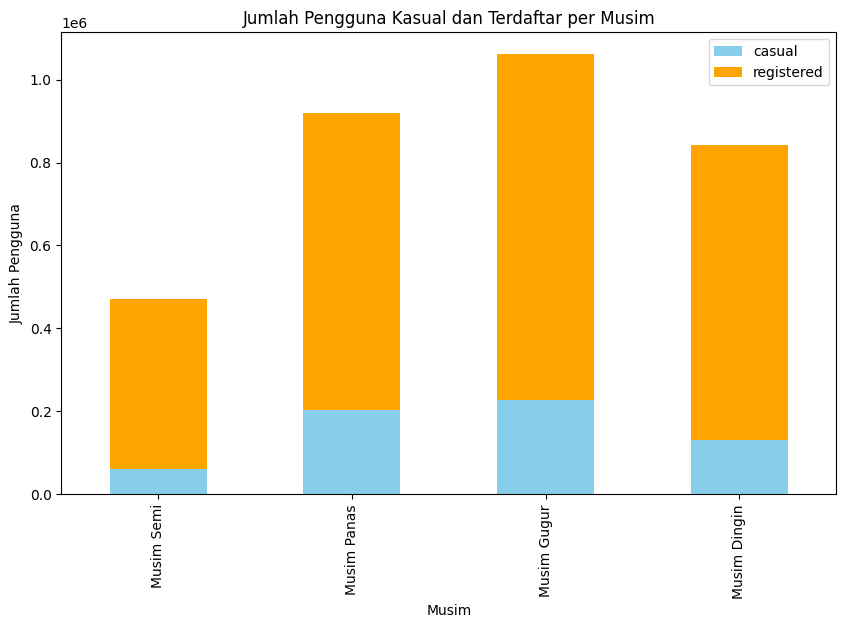

In [32]:
# Mengelompokkan data berdasarkan musim dan menghitung jumlah pengguna kasual dan terdaftar
seasonal_user_data = day_df.groupby('season')[['casual', 'registered']].sum().reset_index()

# Membuat stacked bar chart
plt.figure(figsize=(10, 6))
seasonal_user_data.set_index('season').plot(kind='bar', stacked=True, color=['skyblue', 'orange'], ax=plt.gca())

# Menambahkan judul dan label sumbu
plt.title('Jumlah Pengguna Kasual dan Terdaftar per Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Pengguna')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'])

# Menampilkan plot
plt.show()

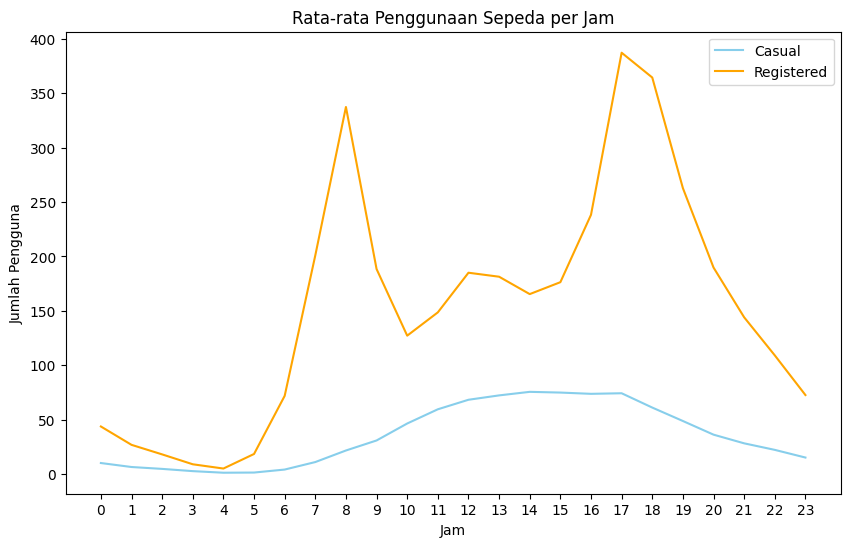

In [34]:
# Mengelompokkan data berdasarkan jam dan menghitung jumlah pengguna kasual dan terdaftar
hourly_user_data = hour_df.groupby('hr')[['casual', 'registered']].mean().reset_index()

# Membuat line chart
plt.figure(figsize=(10, 6))
plt.plot(hourly_user_data['hr'], hourly_user_data['casual'], label='Casual', color='skyblue')
plt.plot(hourly_user_data['hr'], hourly_user_data['registered'], label='Registered', color='orange')

# Menambahkan judul dan label sumbu
plt.title('Rata-rata Penggunaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Pengguna')
plt.xticks(ticks=range(0, 24))

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

**Insight:**

Penggunaan sepeda tertinggi terjadi pada musim gugur dan terendah pada musim semi. Pengguna terdaftar lebih dominan dibanding pengguna kasual. Aktivitas penyewaan meningkat tajam pada jam sibuk pagi dan sore, terutama oleh pengguna terdaftar.

### Pertanyaan 3:
Faktor lingkungan apa yang paling memengaruhi jumlah penyewaan sepeda?

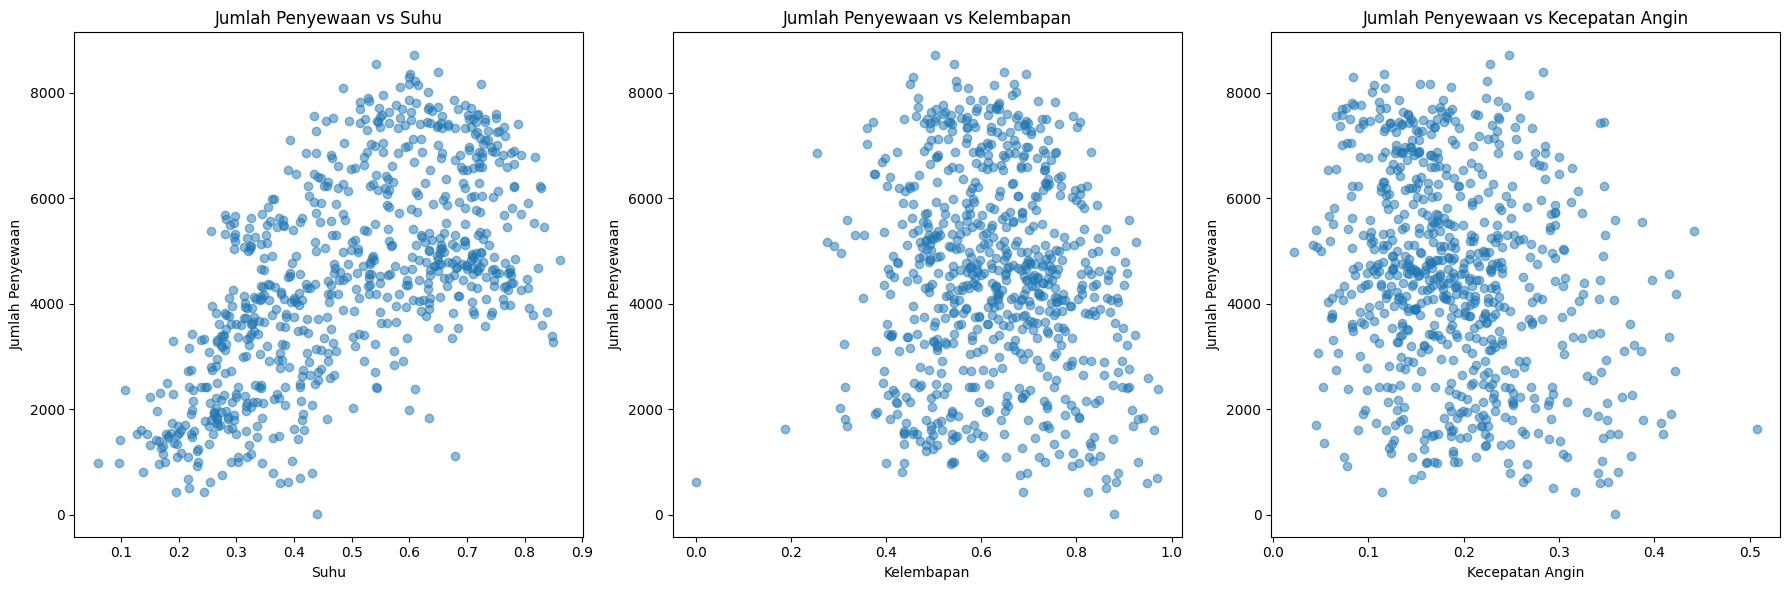

In [38]:
# Scatter plot untuk melihat hubungan antara jumlah penyewaan sepeda dengan suhu, kelembapan, dan kecepatan angin
plt.figure(figsize=(18, 6))

# Scatter plot untuk suhu
plt.subplot(1, 3, 1)
plt.scatter(day_df['temp'], day_df['cnt'], alpha=0.5)
plt.title('Jumlah Penyewaan vs Suhu')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Penyewaan')

# Scatter plot untuk kelembapan
plt.subplot(1, 3, 2)
plt.scatter(day_df['hum'], day_df['cnt'], alpha=0.5)
plt.title('Jumlah Penyewaan vs Kelembapan')
plt.xlabel('Kelembapan')
plt.ylabel('Jumlah Penyewaan')

# Scatter plot untuk kecepatan angin
plt.subplot(1, 3, 3)
plt.scatter(day_df['windspeed'], day_df['cnt'], alpha=0.5)
plt.title('Jumlah Penyewaan vs Kecepatan Angin')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Jumlah Penyewaan')

plt.tight_layout()
plt.show()

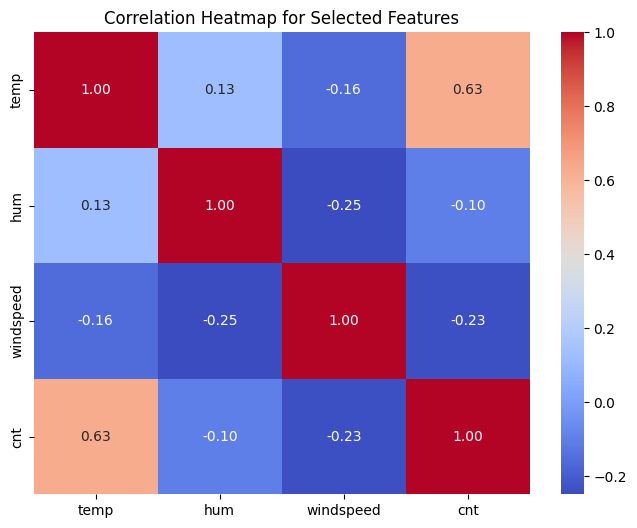

In [39]:
# Filter the correlation matrix for the selected features
selected_features = ['temp', 'hum', 'windspeed', 'cnt']
correlation_matrix_filtered = day_df[selected_features].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sn.heatmap(correlation_matrix_filtered, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Selected Features')
plt.show()

**Insight:**

Dari scatter plot dan analisis korelasi, terlihat bahwa suhu memiliki korelasi positif yang cukup kuat (0,63) terhadap jumlah penyewaan sepeda, menunjukkan bahwa semakin tinggi suhu, semakin banyak sepeda yang disewa. Sebaliknya, kelembapan dan kecepatan angin memiliki korelasi negatif yang lemah terhadap jumlah penyewaan, yang mengindikasikan bahwa kondisi cuaca lembap atau berangin sedikit mengurangi jumlah penyewaan sepeda.

### Pertanyaan 4:
Bagaimana dampak hari libur terhadap jumlah penyewaan sepeda?

C:\Users\acer\AppData\Local\Temp\ipykernel_15132\2354562152.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.boxplot(x='holiday', y='cnt', data=day_df, palette='viridis')


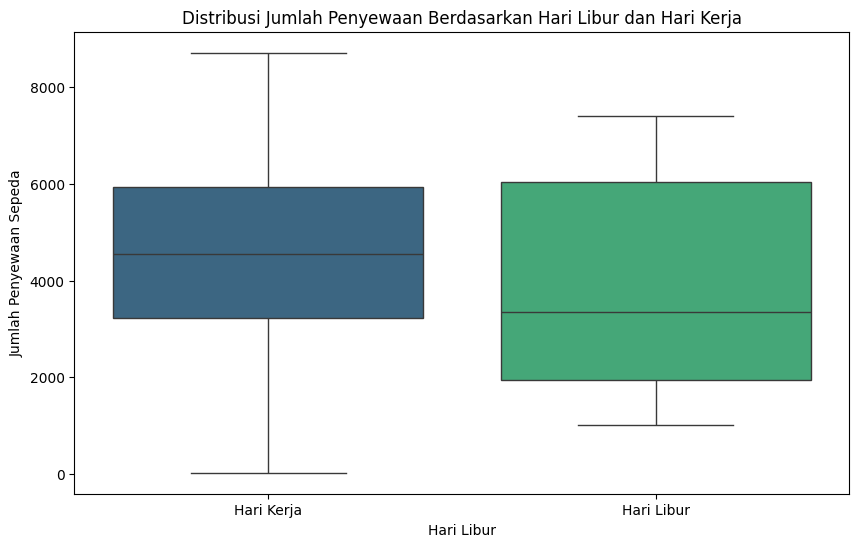

In [35]:
plt.figure(figsize=(10, 6))
sn.boxplot(x='holiday', y='cnt', data=day_df, palette='viridis')

# Menambahkan judul dan label sumbu
plt.title('Distribusi Jumlah Penyewaan Berdasarkan Hari Libur dan Hari Kerja')
plt.xlabel('Hari Libur')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(ticks=[0, 1], labels=['Hari Kerja', 'Hari Libur'])

# Menampilkan plot
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_15132\3153072839.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x='holiday', y='cnt', data=workday_holiday_avg, palette='viridis')


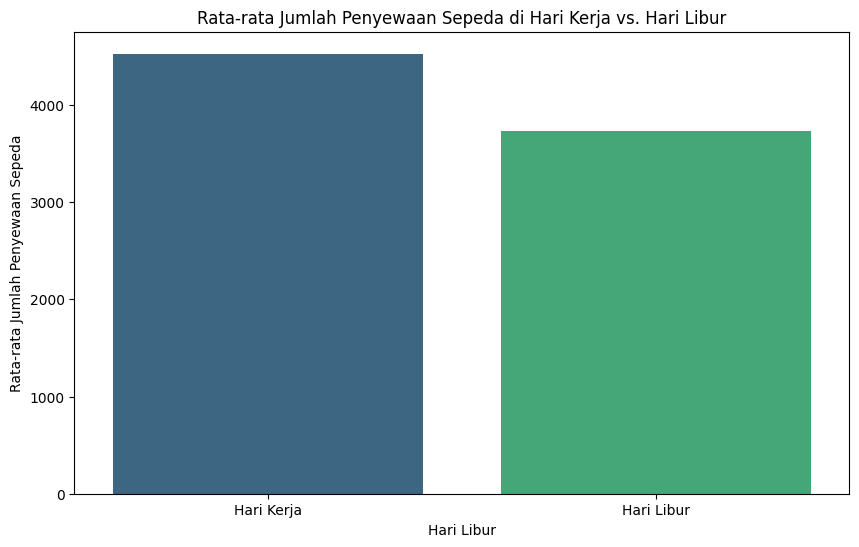

In [40]:
# Mengelompokkan data berdasarkan hari kerja dan hari libur, kemudian menghitung rata-rata jumlah penyewaan sepeda
workday_holiday_avg = day_df.groupby('holiday')['cnt'].mean().reset_index()

# Membuat bar chart
plt.figure(figsize=(10, 6))
sn.barplot(x='holiday', y='cnt', data=workday_holiday_avg, palette='viridis')

# Menambahkan judul dan label sumbu
plt.title('Rata-rata Jumlah Penyewaan Sepeda di Hari Kerja vs. Hari Libur')
plt.xlabel('Hari Libur')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.xticks(ticks=[0, 1], labels=['Hari Kerja', 'Hari Libur'])

# Menampilkan plot
plt.show()

**Insight:**

Jumlah penyewaan sepeda cenderung lebih tinggi pada hari kerja dibandingkan hari libur, menunjukkan bahwa sepeda lebih banyak digunakan untuk keperluan mobilitas sehari-hari. Namun, pada hari libur, variasi jumlah penyewaan lebih besar, yang mungkin dipengaruhi oleh faktor eksternal seperti cuaca atau aktivitas rekreasi.

## Analisis Lanjutan (Opsional)

   instant  Recency  Frequency  Monetary
0        1      730        985  0.344167
1        2      729        801  0.363478
2        3      728       1349  0.196364
3        4      727       1562  0.200000
4        5      726       1600  0.226957
   instant  Recency  Frequency  Monetary R_Score F_Score M_Score RFM_Score
0        1      730        985  0.344167       1       1       2       112
1        2      729        801  0.363478       1       1       2       112
2        3      728       1349  0.196364       1       1       1       111
3        4      727       1562  0.200000       1       1       1       111
4        5      726       1600  0.226957       1       1       1       111


C:\Users\acer\AppData\Local\Temp\ipykernel_15132\1045894357.py:37: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  rfm_matrix = rfm_df.pivot_table(index='R_Score', columns='F_Score', values='Monetary', aggfunc='mean')


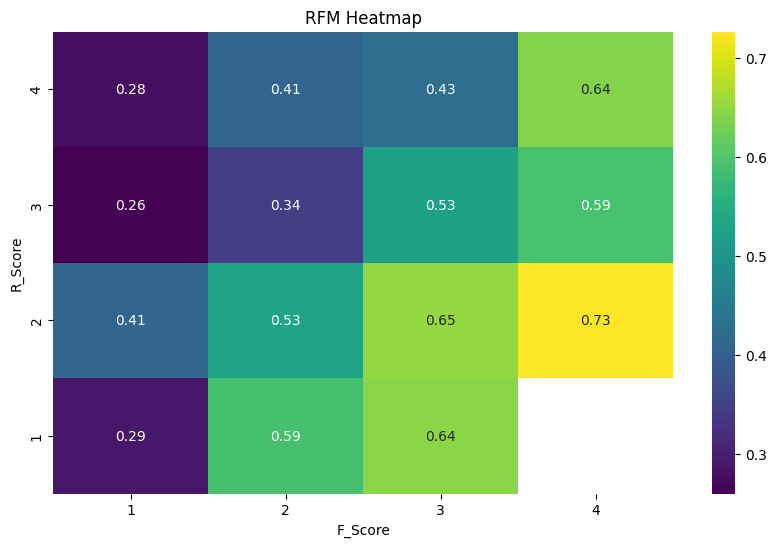

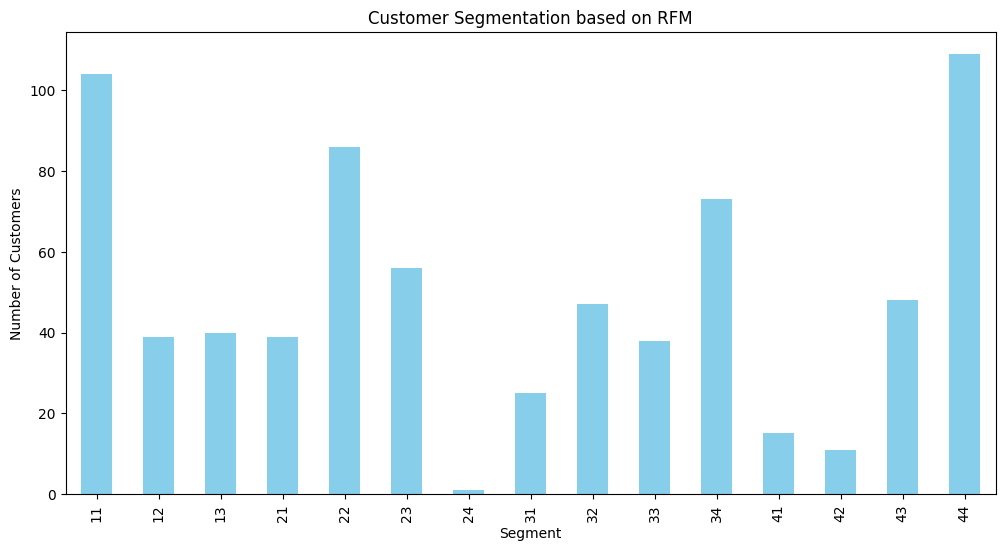

In [43]:
import datetime as dt

# Menghitung Recency, Frequency, dan Monetary


# Menentukan tanggal referensi (misalnya, hari terakhir dalam dataset)
reference_date = day_df['dteday'].max()

# Menghitung Recency
day_df['Recency'] = (reference_date - day_df['dteday']).dt.days

# Menghitung Frequency dan Monetary
rfm_df = day_df.groupby('instant').agg({
    'Recency': 'min',  # Mengambil nilai minimum dari Recency
    'cnt': 'sum',      # Menghitung total penyewaan (Frequency)
    'temp': 'sum'      # Menggunakan suhu sebagai proxy untuk Monetary
}).reset_index()

# Mengganti nama kolom
rfm_df.rename(columns={'cnt': 'Frequency', 'temp': 'Monetary'}, inplace=True)

# Menampilkan hasil RFM
print(rfm_df.head())

# Memberikan skor RFM
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], 4, labels=[4, 3, 2, 1])
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], 4, labels=[1, 2, 3, 4])

# Menggabungkan skor RFM
rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

# Menampilkan hasil RFM dengan skor
print(rfm_df.head())

# Visualisasi Heatmap untuk melihat distribusi RFM Score
rfm_matrix = rfm_df.pivot_table(index='R_Score', columns='F_Score', values='Monetary', aggfunc='mean')
plt.figure(figsize=(10, 6))
sn.heatmap(rfm_matrix, annot=True, fmt='.2f', cmap='viridis')
plt.title('RFM Heatmap')
plt.show()

# Visualisasi Bar Chart untuk melihat segmentasi pelanggan
rfm_df['Segment'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str)
segment_counts = rfm_df['Segment'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
segment_counts.plot(kind='bar', color='skyblue')
plt.title('Customer Segmentation based on RFM')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.show()

**Insight:**
- Segmen pelanggan bervariasi dari yang sangat aktif hingga yang jarang menggunakan layanan.
- Pola transaksi pelanggan menunjukkan adanya hubungan antara frekuensi penggunaan dan total pengeluaran.
- Strategi marketing dapat disesuaikan berdasarkan segmentasi pelanggan, misalnya menawarkan insentif kepada pelanggan dengan frekuensi rendah untuk meningkatkan penggunaan mereka.

## Conclusion

1. **Pola Penggunaan Sepeda Berdasarkan Musim dan Kondisi Cuaca**  
   Berdasarkan plot jumlah penyewaan sepeda per musim, penyewaan tertinggi terjadi pada musim gugur dan panas, sementara musim semi memiliki jumlah penyewaan paling sedikit. Selain itu, dari boxplot kondisi cuaca, terlihat bahwa penyewaan sepeda cenderung lebih tinggi pada kondisi cerah atau berawan, sedangkan hujan dan salju menyebabkan penurunan signifikan dalam jumlah penyewaan.  

2. **Perbedaan Pola Penggunaan antara Pengguna Kasual dan Terdaftar**  
   Pengguna terdaftar lebih dominan dibanding pengguna kasual. Aktivitas penyewaan meningkat tajam pada jam sibuk pagi dan sore, terutama oleh pengguna terdaftar.
   
3. **Faktor Lingkungan yang Paling Memengaruhi Penyewaan Sepeda**  
   Cuaca dan musim merupakan faktor utama yang memengaruhi penyewaan sepeda, terlihat dari bar plot yang menunjukkan variasi penyewaan antar musim dan boxplot yang menunjukkan distribusi jumlah penyewaan berdasarkan kondisi cuaca. Kondisi cerah atau berawan mendukung jumlah penyewaan yang lebih tinggi dibandingkan kondisi hujan atau salju.  

4. **Dampak Hari Libur terhadap Penyewaan Sepeda**  
   Jumlah penyewaan sepeda cenderung lebih tinggi pada hari kerja dibandingkan hari libur, menunjukkan bahwa sepeda lebih banyak digunakan untuk keperluan mobilitas sehari-hari. Namun, pada hari libur, variasi jumlah penyewaan lebih besar, yang mungkin dipengaruhi oleh faktor eksternal seperti cuaca atau aktivitas rekreasi.